# Get data from fedeo_ceda using EODAG

This tutorial will show you how to use EODAG to search and download data from the [fedeo_ceda](https://fedeo.ceda.ac.uk/) provider.

In [1]:
from eodag import EODataAccessGateway, setup_logging

setup_logging(2)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG
dag = EODataAccessGateway()
dag.set_preferred_provider("fedeo_ceda")

2025-09-17 09:26:58,285 eodag.config                     [INFO    ] Loading user configuration from: /home/tlarrouy/.config/eodag/eodag.yml
2025-09-17 09:26:58,293 eodag.config                     [INFO    ] cop_dataspace_s3: unknown provider found in user conf, trying to use provided configuration
2025-09-17 09:26:58,294 eodag.config                     [WARNING ] cop_dataspace_s3 skipped: could not be loaded from user configuration
2025-09-17 09:26:58,298 eodag.core                       [INFO    ] usgs: provider needing auth for search has been pruned because no credentials could be found
2025-09-17 09:26:58,298 eodag.core                       [INFO    ] aws_eos: provider needing auth for search has been pruned because no credentials could be found
2025-09-17 09:26:58,299 eodag.core                       [INFO    ] cop_ads: provider needing auth for search has been pruned because no credentials could be found
2025-09-17 09:26:58,299 eodag.core                       [INFO    ] cop_c

## List product types

list all the product types available from the fedeo_ceda provider.

In [2]:
product_types = dag.list_product_types(provider="fedeo_ceda")
product_types

2025-09-17 09:26:58,330 eodag.config                     [INFO    ] Fetching external product types from https://cs-si.github.io/eodag/eodag/resources/ext_product_types.json


[{'ID': 'AATSR_ADV_L2_V2.31',
  '_id': 'AATSR_ADV_L2_V2.31',
  'abstract': 'The ESA Climate Change Initiative Aerosol project has produced a number of global aerosol Essential Climate Variable (ECV) products from a set of European satellite instruments with different characteristics.  This dataset comprises Level 2 aerosol products from the AATSR instrument on ENVISAT, derived using the ADV algorithm, version 2.31. Data is available for the period 2002-2012.For further details about these data products please see the linked documentation.',
  'instrument': 'AATSR',
  'keywords': 'aatsr,aatsr-adv-l2-v2.31,aerosol,cci,dif10,earth-science>atmosphere>aerosols,envisat,esa,orthoimagery',
  'license': 'other',
  'missionStartDate': None,
  'platform': 'Envisat',
  'platformSerialIdentifier': None,
  'processingLevel': None,
  'title': 'ESA Aerosol Climate Change Initiative (Aerosol_cci): Level 2 aerosol products from AATSR (ADV Algorithm), Version 2.31'},
 {'ID': 'AATSR_ADV_L3_V2.31',
  '_id'

## Search data

With one of the product types listed above, you can search for data.

In [16]:
products = dag.search(
    provider="fedeo_ceda",
    start="2008-01-01",
    end="2009-12-31",
    productType="V6.0-RELEASE_SINUSOIDAL_NETCDF_IOP",
    format="netCDF",
)
products

2025-09-17 11:01:45,262 eodag.core                       [INFO    ] Searching on provider fedeo_ceda
2025-09-17 11:01:45,264 eodag.search.qssearch            [INFO    ] Sending search request: https://fedeo.ceos.org/search


SearchResult([EOProduct(id=f9002427c3d78b986b9c1d3e83995b7f671dde3b, provider=fedeo_ceda),
              EOProduct(id=2b786c6ff547709785737e50a4c17fa6891d7c35, provider=fedeo_ceda),
              EOProduct(id=d745e825623b7824d0b762a88545d851f93eaf08, provider=fedeo_ceda),
              EOProduct(id=39ec77d33f1a2c8608b8ce840c8c6ce95d1a5ccd, provider=fedeo_ceda),
              EOProduct(id=d9ef982cf3b21e826cc5b24c3a70b94b25f6e68a, provider=fedeo_ceda),
              EOProduct(id=4ae33d263e3357469c86c3bd1739f2648f7796c6, provider=fedeo_ceda),
              EOProduct(id=07549f4b358c9d8697f08e140b6bb9d5b210e6ec, provider=fedeo_ceda),
              EOProduct(id=7557de79427022b170190c9e6804523fc48b17d8, provider=fedeo_ceda),
              EOProduct(id=7b57d9a2dd1078a7e8061c3d771c3b1485a5ce10, provider=fedeo_ceda),
              EOProduct(id=cea159a414a9b4cf64ae783bd5ebeefe3a72693a, provider=fedeo_ceda),
              EOProduct(id=d244469d7743b4f28eaeddecc73bfc712d92f475, provider=fedeo_ceda),
              EOProduct(id=bd1721d5e638fd0c58bdb5525590224924ae2433, provider=fedeo_ceda),
              EOProduct(id=0a5460e5b42104da691daf43a17f92d097488517, provider=fedeo_ceda),
              EOProduct(id=9e446c3f5744aa923881dce9f343f92bcb161b08, provider=fedeo_ceda),
              EOProduct(id=2b6442bae6c2317a6fdb192af5585a81c93ccb47, provider=fedeo_ceda),
              EOProduct(id=fae464f9a2e5dbf465420938f3bf794f556aa287, provider=fedeo_ceda),
              EOProduct(id=5b0ca8f8828e9f1d555c5e512bc33356d1a3ec2a, provider=fedeo_ceda),
              EOProduct(id=b9be5d236d6c61efaadf9cb4cfab774a18204d8a, provider=fedeo_ceda),
              EOProduct(id=5bd63d3c86905598330296f7d1eab851af7b2467, provider=fedeo_ceda),
              EOProduct(id=b2cecc466d014db6d8f139b649904e4893510e29, provider=fedeo_ceda)])

## Open dataset with `to_xarray` from [eodag-cube](https://github.com/CS-SI/eodag-cube) and plot over a map using `cartopy`

In [17]:
# Get XarrayDict
xd = products[2].to_xarray()
xd

XarrayDict (1)


In [18]:
# Dataset from XarrayDict first value
ds = next(iter(xd.values()))
ds

<xarray.Dataset> Size: 5GB
Dimensions:           (time: 1, bin_index: 23761676)
Coordinates:
    lat               (bin_index) float32 95MB ...
    lon               (bin_index) float32 95MB ...
  * time              (time) datetime64[ns] 8B 2008-01-11
Dimensions without coordinates: bin_index
Data variables: (12/56)
    MERIS_nobs_sum    (time, bin_index) float32 95MB ...
    MODISA_nobs_sum   (time, bin_index) float32 95MB ...
    OLCI-A_nobs_sum   (time, bin_index) float32 95MB ...
    OLCI-B_nobs_sum   (time, bin_index) float32 95MB ...
    SeaWiFS_nobs_sum  (time, bin_index) float32 95MB ...
    VIIRS_nobs_sum    (time, bin_index) float32 95MB ...
    ...                ...
    bbp_490           (time, bin_index) float32 95MB ...
    bbp_510           (time, bin_index) float32 95MB ...
    bbp_560           (time, bin_index) float32 95MB ...
    bbp_665           (time, bin_index) float32 95MB ...
    crs               (time) int32 4B ...
    total_nobs_sum    (time, bin_index) float32 95MB ...
Attributes: (12/64)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    modificationDate:                  2023-04-24T16:51:29
    startTimeFromAscendingNode:        2008-01-11T00:00:00+00:00
    completionTimeFromAscendingNode:   2008-01-15T23:59:00+00:00
    downloadLink:                      https://fedeo.ceos.org/collections/024...
    storageStatus:                     ONLINE
    start_datetime:                    2008-01-11T00:00:00+00:00

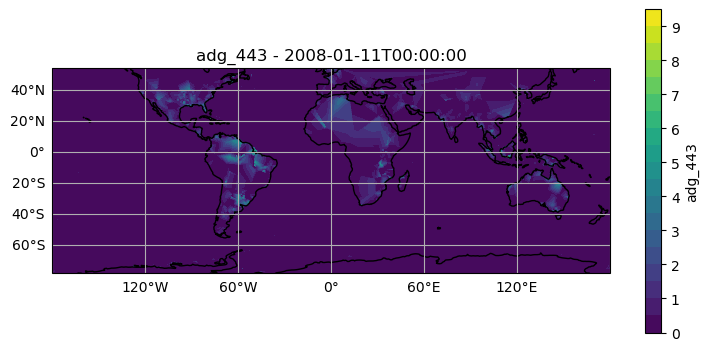

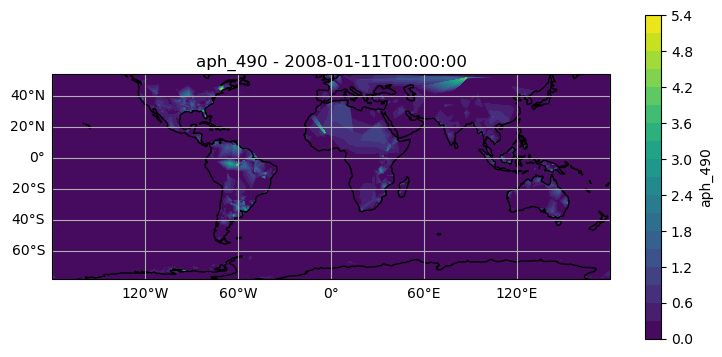

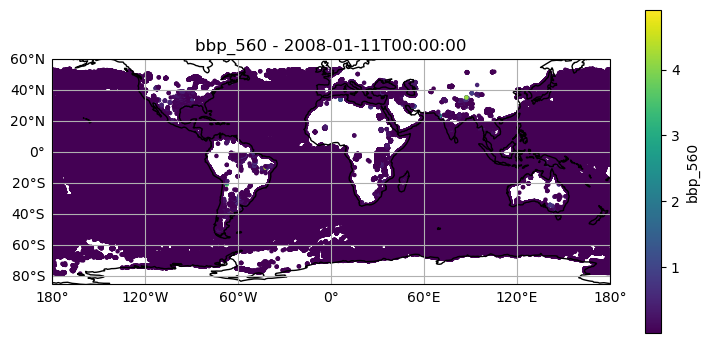

(<Figure size 900x600 with 2 Axes>,
 <GeoAxes: title={'center': 'bbp_560 - 2008-01-11T00:00:00'}>)

In [ ]:
from datetime import UTC
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

def plot_bin_variable(ds, var="adg_443", time_index=0, levels=20, world=True, scatter=False):
    """
    Plot a binned variable from the dataset on a map.
    """
    # --- extract data ---
    lats = ds["lat"].values.ravel()
    lons = ds["lon"].values.ravel()
    data = ds[var].isel(time=time_index).values.ravel()

    # --- filter ---
    mask = np.isfinite(lats) & np.isfinite(lons) & np.isfinite(data)
    lats, lons, data = lats[mask], lons[mask], data[mask]

    # --- title ---
    time_val = str(np.array(ds["time"].values[time_index]).astype("datetime64[s]"))
    title = f"{var} - {time_val}"

    # --- plot ---
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(9, 6))

    if scatter:
        sc = ax.scatter(lons, lats, c=data, s=5, cmap="viridis", transform=ccrs.PlateCarree())
        cbar = plt.colorbar(sc, ax=ax, shrink=0.7, label=var)
    else:
        tcf = ax.tricontourf(lons, lats, data, levels=levels, cmap="viridis", transform=ccrs.PlateCarree())
        cbar = plt.colorbar(tcf, ax=ax, shrink=0.7, label=var)

    ax.set_title(title)
    ax.coastlines()

    if not world:
        ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

    gridlines = ax.gridlines(draw_labels=True)
    gridlines.right_labels = False
    gridlines.top_labels = False

    plt.show()
    return fig, ax


plot_bin_variable(ds, "adg_443", time_index=0, world=False)

plot_bin_variable(ds, "aph_490", time_index=0, world=True)

plot_bin_variable(ds, "bbp_560", time_index=0, scatter=True)


## Download data

You can download one or all of the products found during the search step.

In [ ]:
# Download one product
product = products[2]
download_info = dag.download(product)
download_info

# Download all products
download_infos = dag.download_all(products)
download_infos

0.00B [00:00, ?B/s]

2025-09-17 09:28:39,562 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/25dc26d4b9d8674586ca4cc36136130d3fc58dfa?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:28:49,926 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/25dc26d4b9d8674586ca4cc36136130d3fc58dfa?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:28:49,927 eodag.core                       [INFO    ] Downloading 20 products


Downloaded products:   0%|          | 0/20 [00:00<?, ?product/s]

0.00B [00:00, ?B/s]

2025-09-17 09:28:49,943 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/b8cea8cb0e0616811eaa4a8893798da0abe542d8?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:28:50,449 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/b8cea8cb0e0616811eaa4a8893798da0abe542d8?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:28:50,459 eodag.download.base              [INFO    ] Product already present on this platform. Identifier: /tmp/20020725-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2
2025-09-17 09:28:50,460 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/25dc26d4b9d8674586ca4cc36136130d3fc58dfa?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:28:50,467 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/2a49f85584b2af7c908d6870f2d9476ee4fa0221?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:29:01,357 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/2a49f85584b2af7c908d6870f2d9476ee4fa0221?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:29:01,368 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/695cf42426e77a0236ff5e3a4de10c8df6ebe18c?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:29:13,515 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/695cf42426e77a0236ff5e3a4de10c8df6ebe18c?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:29:13,524 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/94fa5644279e1559f40a2a4371ed81de7db0c13a?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:29:32,878 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/94fa5644279e1559f40a2a4371ed81de7db0c13a?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:29:32,889 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/830954a7164f04512934cb7ba7d063ecb76de611?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:29:47,477 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/830954a7164f04512934cb7ba7d063ecb76de611?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:29:47,489 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/0ecc77d98bb34177aa3431948f88311ffdf05689?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:30:03,865 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/0ecc77d98bb34177aa3431948f88311ffdf05689?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:30:03,875 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/c7a7d3de7673a1a648bab0e49754ea5ffc313826?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:30:21,880 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/c7a7d3de7673a1a648bab0e49754ea5ffc313826?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:30:21,888 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/7ed4eff1c856b19de0aad14813e4ee820aea6b0c?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:30:41,034 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/7ed4eff1c856b19de0aad14813e4ee820aea6b0c?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:30:41,046 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/c3775831c2f42f5b8f5703428476683daf23c67d?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:30:52,615 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/c3775831c2f42f5b8f5703428476683daf23c67d?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:30:52,625 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/dbb547ea12502b194a21b2cdfd3869807d3b0ebc?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:30:58,472 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/dbb547ea12502b194a21b2cdfd3869807d3b0ebc?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:30:58,483 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/0bec450c74ee0479a8c18e68e729db10926bdb34?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:31:07,780 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/0bec450c74ee0479a8c18e68e729db10926bdb34?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:31:07,789 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/6e1af902bc52501b446d5b87edf97cec8a94410d?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:31:16,278 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/6e1af902bc52501b446d5b87edf97cec8a94410d?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:31:16,290 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/99a7e9dce5743b34b884a2b0387653bfcdb45b39?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:31:25,293 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/99a7e9dce5743b34b884a2b0387653bfcdb45b39?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:31:25,304 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/9a8363669b0d1ec2606596b093bda35fc3de6fb1?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:31:37,388 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/9a8363669b0d1ec2606596b093bda35fc3de6fb1?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:31:37,398 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/5321aeddaac17232da2c381737f2ad6ab8d5666f?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:31:51,502 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/5321aeddaac17232da2c381737f2ad6ab8d5666f?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:31:51,512 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/998ee06fe3826e52123832b565bbbba63996301e?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:32:00,944 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/998ee06fe3826e52123832b565bbbba63996301e?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:32:00,954 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/4a35bb209a5f1170f7595befda7bc0ded892c49a?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:32:08,004 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/4a35bb209a5f1170f7595befda7bc0ded892c49a?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:32:08,015 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/84ed9d16733d879dfa53f79b3b3071c6e824cfc2?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:32:18,750 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/84ed9d16733d879dfa53f79b3b3071c6e824cfc2?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


0.00B [00:00, ?B/s]

2025-09-17 09:32:18,760 eodag.download.base              [INFO    ] Download url: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/294225e0de5854ca30a42a2530d222ae5b73bd49?httpAccept=application/geo%2Bjson;profile=https://stacspec.org
2025-09-17 09:32:27,708 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://fedeo.ceos.org/collections/cdcb0605afa74885a66d8be0fdd2ed24/items/294225e0de5854ca30a42a2530d222ae5b73bd49?httpAccept=application/geo%2Bjson;profile=https://stacspec.org


['/tmp/00README_catalogue_and_licence',
 '/tmp/20020725-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020727-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020729-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020731-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020802-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020804-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020806-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020808-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020810-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020724-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020728-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020801-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020805-ESACCI-L2P_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ENS-v2',
 '/tmp/20020809-ESACCI-L2P_AEROSOL-AE